# CAPP30254 - Homework 2 - ML Pipeline
### Alec MacMillen
### Due Thursday 4/18/2019

This file imports the module pipeline.py and uses the functions defined there to put together a simple machine learning model trained to predict what individuals will experience financial distress in the next 2 years, using a variety of financial and demographic information about the individuals.

In [1]:
import pipeline as ppl

### Read and Explore Data

The first task is to load the data and perform some basic exploration of its contents.

In [2]:
credit = ppl.load_data("credit-data.csv", dtypes={'PersonID':str, 'zipcode':str})

In [3]:
metadata = ppl.generate_metadata(credit)
metadata

,colname,type,pct_null
0,PersonID,<class 'str'>,0.000000
1,SeriousDlqin2yrs,<class 'numpy.int64'>,0.000000
2,RevolvingUtilizationOfUnsecuredLines,<class 'numpy.float64'>,0.000000
3,age,<class 'numpy.int64'>,0.000000
4,zipcode,<class 'str'>,0.000000
5,NumberOfTime30-59DaysPastDueNotWorse,<class 'numpy.int64'>,0.000000
6,DebtRatio,<class 'numpy.float64'>,0.000000
7,MonthlyIncome,<class 'numpy.float64'>,0.194412
8,NumberOfOpenCreditLinesAndLoans,<class 'numpy.int64'>,0.000000
9,NumberOfTimes90DaysLate,<class 'numpy.int64'>,0.000000


This metadata table gives the list of columns found in the data, their data type, and the percentage of values that are null. Here we see that *PersonID* and *zipcode* are the only string variables (so defined because we explicitly read them in that way) and that *MonthlyIncome* (19.4%) and *NumberOfDependents* (2.53%) are the only fields with missing values.

In [4]:
summary = ppl.generate_summary(credit)
summary

,colname,mean,median,min,max,std_dev,count
0,SeriousDlqin2yrs,0.161400,0.000000,0.0,1.0,0.367904,41016
1,RevolvingUtilizationOfUnsecuredLines,6.375870,0.189730,0.0,22000.0,221.618950,41016
2,age,51.683489,51.000000,21.0,109.0,14.746880,41016
3,NumberOfTime30-59DaysPastDueNotWorse,0.589233,0.000000,0.0,98.0,5.205628,41016
4,DebtRatio,331.458137,0.369736,0.0,106885.0,1296.109695,41016
5,MonthlyIncome,6578.995733,5250.000000,0.0,1794060.0,13446.825930,41016
6,NumberOfOpenCreditLinesAndLoans,8.403477,8.000000,0.0,56.0,5.207324,41016
7,NumberOfTimes90DaysLate,0.419592,0.000000,0.0,98.0,5.190382,41016
8,NumberRealEstateLoansOrLines,1.008801,1.000000,0.0,32.0,1.153826,41016
9,NumberOfTime60-89DaysPastDueNotWorse,0.371587,0.000000,0.0,98.0,5.169641,41016


The above summary table gives summary statistics for the numeric variables found in the credit data. There appear to be some fields with outliers: for example, the median *MonthlyIncome* is 5,250 but the maximum is 1,794,060. Similarly, the median *NumberOfTimes90DaysLate* is 0, but the max value is 98. To get a more nuanced look at the data, produce data distributions for each individual variable while excluding that variable's outlier values.

Classify an "outlier" as any observation that falls outside of the interquartile range (difference between Q3 and Q1 values) by at least 1.5 * the size of the IQR.

In [5]:
summary_no_outliers = ppl.generate_summary(credit, outliers=False)
summary_no_outliers

,colname,mean,median,min,max,std_dev,count
0,SeriousDlqin2yrs,0.000000,0.000000,0,0,0.000000,34396
0,RevolvingUtilizationOfUnsecuredLines,0.354307,0.186340,0,1.61056,0.370966,40809
0,age,51.634912,51.000000,21,93,14.681644,40971
0,NumberOfTime30-59DaysPastDueNotWorse,0.000000,0.000000,0,0,0.000000,33082
0,DebtRatio,0.342263,0.287481,0,1.89982,0.293969,32643
0,MonthlyIncome,5652.012101,5045.000000,0,15125,3214.405766,39624
0,NumberOfOpenCreditLinesAndLoans,7.956674,7.000000,0,20,4.441677,39930
0,NumberOfTimes90DaysLate,0.000000,0.000000,0,0,0.000000,37586
0,NumberRealEstateLoansOrLines,0.965016,1.000000,0,5,0.986391,40761
0,NumberOfTime60-89DaysPastDueNotWorse,0.000000,0.000000,0,0,0.000000,37988


These outlier-free statistics will provide a helpful basis for "binning" or converting continuous variables to numeric variables later on.

Now visualize the distribution of some variables (while excluding outliers for ease of visualization).

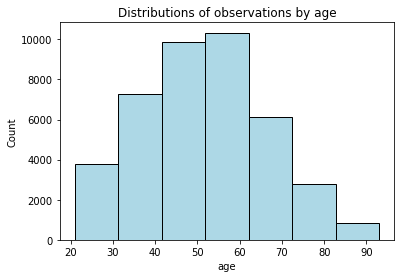

In [6]:
ppl.generate_histogram(credit, "age", "lightblue", 10, "Distributions of observations by age")

The data appears to be comprised mostly of people in their 40s and 50s.

C:\Users\Alec\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Alec\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


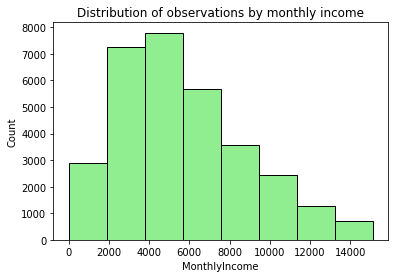

In [7]:
ppl.generate_histogram(credit, "MonthlyIncome", "lightgreen", 2000, "Distribution of observations by monthly income")

Most individuals in the dataset appear to have monthly incomes between $2,000 and $6,000. The distribution is right-skewed, which is typical for income distributions.

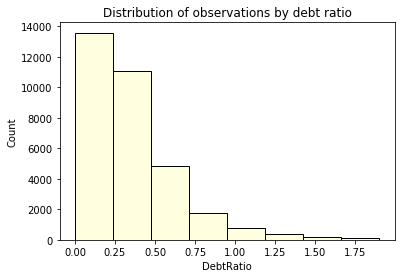

In [8]:
ppl.generate_histogram(credit, "DebtRatio", "lightyellow", 0.25, "Distribution of observations by debt ratio")

Most folks have debt ratios between 0 and 0.5. There is a long right tail of people with a very high debt-to-monthly-income ratio.

We can also produce a correlation heatmap to get a better understanding of how different variables in the dataset are related.

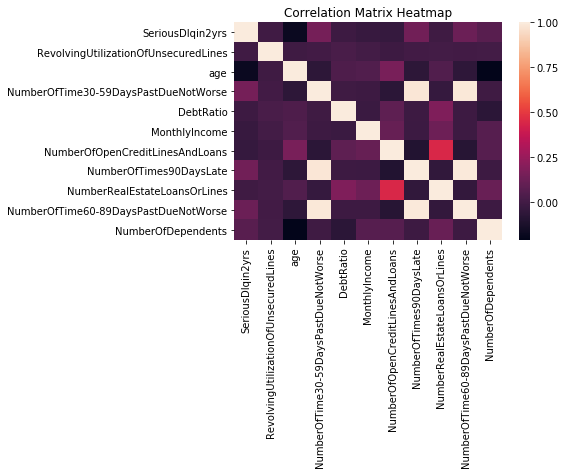

In [9]:
ppl.correlation_heatmap(credit)

Most of the variables do not appear to have a very strong correlation with *SeriousDlqin2yrs* judging by the heatmap's hues. The three variables that appear to have slight/weak correlations are *NumberOfTimes30-59DaysPastDueNotWorse*, *NumberOfTimes90DaysLate*, and *NumberOfTimes60-89DaysPastDueNotWorse*. This suggests that prior history of late payments will be particularly indicative of the potential for future financial distress.

To take a closer look at whether there are any correlations between the prior late payment history variables and any other possible features, produce some scatter plots (these plots drop outliers on both the x- and y-axes):

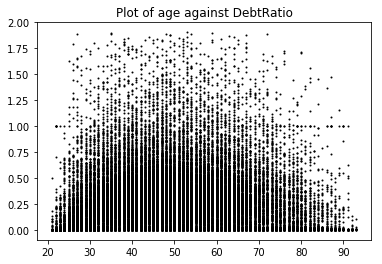

In [10]:
ppl.plot_scatter(credit, "age", "DebtRatio")

There appears to be a weak negative quadratic relationship between age and debt-to-income ratio, with average debt-to-income being slightly higher for people in middle age as opposed to youths and seniors. There are also a lot of observations with debt-to-income ratio of exactly 1, suggesting that these values may have been imputed or filled in to replace missing values.

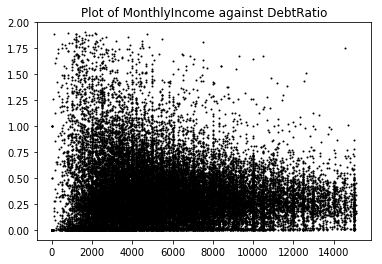

In [11]:
ppl.plot_scatter(credit, "MonthlyIncome", "DebtRatio")

It appears that people with lower monthly incomes tend to have higher average debt ratios (negative relationship), which makes intuitive sense.

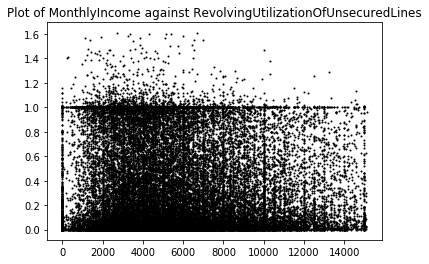

In [12]:
ppl.plot_scatter(credit, "MonthlyIncome", "RevolvingUtilizationOfUnsecuredLines")

It appears that people with the lowest incomes utilize credit somewhat less often than their counterparts that make \\$1,000 and more per month, and that people in a low-medium range of monthly income (\\$2,000-\\$6,000) tend to utilize a higher proportion of their available credit than folks who make above \\$6,000, who exhibit a much wider distribution of credit utilization. People with lower income also appear to overuse credit (exceed their maximums) somewhat more often than people with higher incomes, which again makes intuitive sense.

The next logical step would be to fill in NA values with some reasonable imputation. From the metadata table displayed above, we know there are only missing values in the fields *MonthlyIncome* and *NumberOfDependents*. In both cases, let's fill missing values with the median, because outliers may be skewing the means to be unrepresentative.

In [13]:
credit = ppl.fill_na_values(credit, "MonthlyIncome", how="median")
credit = ppl.fill_na_values(credit, "NumberOfDependents", how="median")

Now, because we're going to build a decision tree to represent this dataset, we need to discretize continuous variables into a finite number of categories for help in classification. Let's consult our summary table (with outliers dropped) to think about bin boundaries that make sense. Let's also shorten variable names to make them easier to manipulate/deal with.

In [14]:
credit_renamed = credit.rename(columns={'SeriousDlqin2yrs':'SD2', 'RevolvingUtilizationOfUnsecuredLines':'Utilization',
                      'NumberOfTime30-59DaysPastDueNotWorse':'Times30-59', 'NumberOfOpenCreditLinesAndLoans':'CreditLinesLoans',
                      'NumberOfTimes90DaysLate':'Times90', 'NumberRealEstateLoansOrLines':'RELinesLoans',
                      'NumberOfTime60-89DaysPastDueNotWorse':'Times60-89', 'NumberOfDependents':'Dependents'})
summary_no_outliers = ppl.generate_summary(credit_renamed, outliers=False)
summary_no_outliers

,colname,mean,median,min,max,std_dev,count
0,SD2,0.000000,0.000000,0,0,0.000000,34396
0,Utilization,0.354307,0.186340,0,1.61056,0.370966,40809
0,age,51.634912,51.000000,21,93,14.681644,40971
0,Times30-59,0.000000,0.000000,0,0,0.000000,33082
0,DebtRatio,0.342263,0.287481,0,1.89982,0.293969,32643
0,MonthlyIncome,5307.792972,5250.000000,0,12405,2520.082094,38362
0,CreditLinesLoans,7.956674,7.000000,0,20,4.441677,39930
0,Times90,0.000000,0.000000,0,0,0.000000,37586
0,RELinesLoans,0.965016,1.000000,0,5,0.986391,40761
0,Times60-89,0.000000,0.000000,0,0,0.000000,37988


In [15]:
summary = ppl.generate_summary(credit_renamed)
summary

,colname,mean,median,min,max,std_dev,count
0,SD2,0.161400,0.000000,0.0,1.0,0.367904,41016
1,Utilization,6.375870,0.189730,0.0,22000.0,221.618950,41016
2,age,51.683489,51.000000,21.0,109.0,14.746880,41016
3,Times30-59,0.589233,0.000000,0.0,98.0,5.205628,41016
4,DebtRatio,331.458137,0.369736,0.0,106885.0,1296.109695,41016
5,MonthlyIncome,6320.623098,5250.000000,0.0,1794060.0,12080.558306,41016
6,CreditLinesLoans,8.403477,8.000000,0.0,56.0,5.207324,41016
7,Times90,0.419592,0.000000,0.0,98.0,5.190382,41016
8,RELinesLoans,1.008801,1.000000,0.0,32.0,1.153826,41016
9,Times60-89,0.371587,0.000000,0.0,98.0,5.169641,41016


Based on the summary tables above, pick some reasonable bin boundaries for discretizing. These parameters can be changed as necessary.

In [16]:
Utilization = [0, 0.5, 1, 1.5, 2, 30000]
Utilization_labels = ["Less than 0.5", "0.5-1", "1-1.5", "1.5-2", "More than 2"]

age = [20, 35, 50, 65, 120]
age_labels = ["20-35", "35-50", "50-65", "65 and above"]

DebtRatio = [0, 0.5, 1, 1.5, 2, 200000]
DebtRatio_labels = ["Less than 0.5", "0.5-1", "1-1.5", "1.5-2", "More than 2"]

MonthlyIncome = [0, 1000, 5000, 10000, 15000, 2000000]
MonthlyIncome_labels = ["Less than $1k", "$1-5k", "$5-10k", "$10-15k", "More than $15k"]

CreditLinesLoans = [0, 5, 10, 15, 60]
CreditLinesLoans_labels = ["Less than 5", "5-10", "11-15", "More than 15"]

Times = [0, 1, 2, 3, 100]
Times_labels = ["Zero", "Once", "Twice", "More than twice"]

Dependents = [0, 1, 2, 3, 100]
Dependents_labels = ["Zero", "One", "Two", "More than two"]

credit_prepped = ppl.discretize_continuous(credit_renamed, "Utilization", Utilization, Utilization_labels)
credit_prepped = ppl.discretize_continuous(credit_prepped, "age", age, age_labels)
credit_prepped = ppl.discretize_continuous(credit_prepped, "DebtRatio", DebtRatio, DebtRatio_labels)
credit_prepped = ppl.discretize_continuous(credit_prepped, "MonthlyIncome", MonthlyIncome, MonthlyIncome_labels)
credit_prepped = ppl.discretize_continuous(credit_prepped, "CreditLinesLoans", CreditLinesLoans, CreditLinesLoans_labels)
credit_prepped = ppl.discretize_continuous(credit_prepped, "Times30-59", Times, Times_labels)
credit_prepped = ppl.discretize_continuous(credit_prepped, "Times60-89", Times, Times_labels)
credit_prepped = ppl.discretize_continuous(credit_prepped, "Times90", Times, Times_labels)
credit_prepped = ppl.discretize_continuous(credit_prepped, "Dependents", Dependents, Dependents_labels)

In [17]:
credit_prepped.columns

Index(['PersonID', 'SD2', 'Utilization', 'age', 'zipcode', 'Times30-59',
       'DebtRatio', 'MonthlyIncome', 'CreditLinesLoans', 'Times90',
       'RELinesLoans', 'Times60-89', 'Dependents', 'Utilization_cat',
       'age_cat', 'DebtRatio_cat', 'MonthlyIncome_cat', 'CreditLinesLoans_cat',
       'Times30-59_cat', 'Times60-89_cat', 'Times90_cat', 'Dependents_cat'],
      dtype='object')

### Fitting and evaluating the decision tree model

Now we're ready to begin training our decision tree model. The first step is to create a train-test split among the data we have. This means that our *train* data will utilize the classification labels for the "serious distress" variable to identify how our predictor features relate to instances where the classification label is 0 (no serious distress) or 1 (serious distress). Our *test* data will then take that model and attempt to predict the serious distress indicator using the model learned from the *train* data, and evaluate how well it did against the values of "serious distress" that were actually measured in the testing data.

For a baseline model, let's use all the predictor variables we have aside from *PersonID* (since that's a unique identifier). We are probably *overfitting* the model because we're using a large number of potentially less relevant predictors, but this is just an illustrative example. We will use 0.2 as the testing proportion, meaning that 80% of our data will be used to train the model and 20% will be used to test it.

In [18]:
cols = list(credit_prepped.columns[13:]) + ['SD2']
encoded = ppl.dummify_categorical(credit_prepped, cols)

In [19]:
x_train, x_test, y_train, y_test = ppl.create_splits(encoded, list(encoded.columns[1:]), 'SD2', 0.2)

Now we will create an instance of a decision tree using the training data for our features and classification label.

In [20]:
dec_tree = ppl.fit_decision_tree(x_train, y_train)

The next step is to use our learned decision tree model to predict outcomes for "Serious Distress" in our test data using the provided features. The following function runs a "predicted scores test" to see how the model would predict the chances of test instances falling within the "Distress" or "No distress" classes.

In [21]:
pst = ppl.predict_dec_tree_scores(dec_tree, x_test)

We can plot the distribution of the probability that a given test point represents an individual will experience serious financial "Distress" in the next two years. For example, points with a value of 0.2 represent a 20% chance that the individual will experience serious financial "Distress".

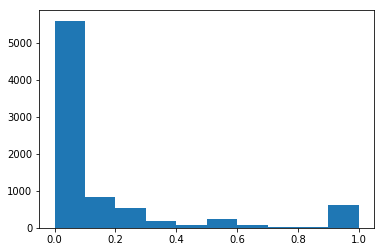

In [22]:
ppl.plot_pst(pst)

Finally, the last step is to calculate an accuracy score for the model. The following function calculates an accuracy score given a threshold (in this case, 0.5). Probabilities under 0.5 are assigned a value of 0 and probabilities above 0.5 are assigned a value of 1, and these assigned values are compared to the actual values (0 or 1) found in the testing data to see whether the model made an accurate prediction about whether an individual falls within the "Distress" category.

In [23]:
test_acc = ppl.calculate_accuracy(pst, y_test, 0.5)

In [24]:
test_acc

0.8590931253047294

With a threshold of 0.5, accuracy of 84.9% suggests that we may have overfit by including too many irrelevant variables. Still, this is a useful exercise that demonstrates the process of fitting a decision tree model.